In [1]:
from IPython.display import display
import os
import sys

import maspy.reader
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

sys.path.append("..")
from python_scripts import ticplot

In [2]:
plt.rcParams["pdf.fonttype"] = 42
plt.rcParams["font.family"] = "Arial"

## Define parameters, load mzml files

In [3]:
# Define parameters
file_dirs = [
    "../ms_data/GFP-bead_Acetylation",
    "../ms_data/GFP-bead_Acetylation",
    "../ms_data/Strp-bead_Acetylation",
    "../ms_data/Strp-bead_Acetylation",
]
filenames = [
    '20170707_QexHF2_RSLC2_Hollenstein_Hartl_UW_MFPL_GFP_0mM_1',
    '20170707_QexHF2_RSLC2_Hollenstein_Hartl_UW_MFPL_GFP_5mM_2',
    '20170710_QexHF2_RSLC2_Hollenstein_Hartl_UW_MFPL_Strp_0mM_1',
    '20170710_QexHF2_RSLC8_Hollenstein_Hartl_UW_MFPL_Strp_5mM_1',
]
output_dir = "../plots/figure_2"

In [4]:
# Read mzml files
msrun_container = maspy.core.MsrunContainer()
for filename, file_dir in zip(filenames, file_dirs):
    filepath = os.path.join(file_dir, filename + ".mzML")
    print(filepath)
    maspy.reader.importMzml(filepath, msrunContainer=msrun_container)

../ms_data/GFP-bead_Acetylation\20170707_QexHF2_RSLC2_Hollenstein_Hartl_UW_MFPL_GFP_0mM_1.mzML
../ms_data/GFP-bead_Acetylation\20170707_QexHF2_RSLC2_Hollenstein_Hartl_UW_MFPL_GFP_5mM_2.mzML
../ms_data/Strp-bead_Acetylation\20170710_QexHF2_RSLC2_Hollenstein_Hartl_UW_MFPL_Strp_0mM_1.mzML
../ms_data/Strp-bead_Acetylation\20170710_QexHF2_RSLC8_Hollenstein_Hartl_UW_MFPL_Strp_5mM_1.mzML


## Plot figures

In [5]:
fignames = [
    "nanobody_tic_plots_acetylated_vs_untreated.pdf",
    "streptavidin_tic_plots_acetylated_vs_untreated.pdf",
]
titles = ["Anti-GFP nanobody", "Streptavidin"]
colors = {
    filenames[0]: "#B0B0B0",  # "#FD4C54",
    filenames[1]: "#E73C40",  # "#00CAC0",
    filenames[2]: "#B0B0B0",  # "#FD4C54",
    filenames[3]: "#E73C40",  # "#00CAC0",
}
light_colors = {
    filenames[0]: "#B0B0B0", # "#fe9498",
    filenames[1]: "#f18a8c",  # "#83e3da",
    filenames[2]: "#B0B0B0", # "#fe9498",
    filenames[3]: "#f18a8c",  # "#83e3da",
}

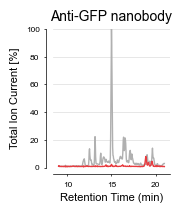

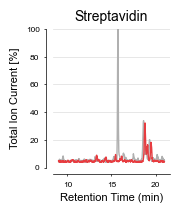

In [6]:
for figname, title, names in zip(fignames, titles, (filenames[:2], filenames[2:4])):
    figpath = os.path.join(output_dir, figname)

    fig, ax = plt.subplots(1, 1, figsize=(1.5, 1.8))
    
    max_intensities = []
    max_intensity = None
    for name in names:
        arrays = msrun_container.getArrays(
            ["tic", "basepeakI", "rt"],
            sort="rt",
            specfiles=name,
            selector=lambda si: si.msLevel == 1,
        )
        arrays["rt"] = arrays["rt"] / 60
        mask = (arrays["rt"] > 9) & (arrays["rt"] < 21)
        
        for key in arrays:
            arrays[key] = arrays[key][mask]
        max_intensity = arrays["tic"].max() if max_intensity is None else max_intensity
        arrays["tic percent"] = arrays["tic"] / max_intensity * 100

        style = {"color": colors[name], "lw": 1}
        ticplot(arrays["rt"], arrays["tic percent"], plotkwargs=style, ax=ax)

    max_ylim = [0, 100]
    ax.set_ylim(max_ylim)
    ax.set_ylabel(ax.get_ylabel() + " [%]")

    ax.set_title(title, fontsize=10)
    fig.savefig(figpath, dpi=300)